<h1 style="text-align: center;" markdown="1">AI Winter School 2019</h1> 
<h2 style="text-align: center;" markdown="2">Dec 10 - Dec 20, 2019</h2>
<h3 style="text-align: center;" markdown="3">Lab on Linear Regression</h3>


> *This notebook is part of the AI Winter School 2019 organized by NAAMII. The objectives of this notebook is to use Linear Regression to predict district wise poverty rates in Nepal using predictor variables such as literacy rate, household size, share of kids etc. The data used in this exercise is part of Census 2011 conducted by the Central Bureau of Statistics (CBS), Nepal.*


# Table of Contents

[Introduction](#introduction)  
&nbsp;&nbsp;&nbsp;[Explanation and Theory](#introduction-theory)  
[Data Setup](#setup)  
[Two Dimensional Linear Regression](#1dlinreg)   
[Scikit-Learn Linear Regression](#sklearn-linreg)    
[Summary](#summary)

# Linear Regression Introduction <a class="anchor" id="introduction"></a>

Linear regression is one of the most simple and well-known machine learning algorithms for regression. It approximates the relationship between two or more variables using a straight line. 

It assumes that there is a linear relationship between the independent variables and the dependent variables. In high-dimensional datasets, this may not be the case, so linear regression may not be the best choice for many problems.



## Explanation and Theory <a class="anchor" id="introduction-theory"></a>

**Assumptions and properties.** 
Suppose we have a data set that consists of n samples and m features

\begin{equation}
\label{eqn:samples}
\mathbf{X} = \{\mathbf{x_1}, \mathbf{x_2}, \ldots \mathbf{x_n}\}, \quad   \mathbf{x_i} \in \mathbb{R}^{m}
\end{equation}

where

\begin{equation}
\label{eqn:features}
\mathbf{x_i} =  (x_i^{(1)}, x_i^{(2)}, \ldots x_i^{(m)} ) ^T
\end{equation}

The target variable is given by
\begin{equation}
\label{eqn:target}
\mathbf{Y}= \{y_1, y_2 \ldots y_n \} \quad where \,\,\, y_j \in (0,1)
\end{equation}

**Algorithm and Training.** Linear regression takes the form of a linear model:

$$f(i)=\beta_0+\beta_1x_{i}^{(1)}+...+\beta_m x_{i}^{(m)} $$

where $\beta_0,...,\beta_m$ are the regression coefficients or weights assigned to each feature $x$. For each data point $i$, a pseudo-variable $x_{0,i}=1$ is added to correspond to the intercept coefficient $\beta_0$. This allows us to write the model in vector form as:
$$f(i)=\boldsymbol{\beta}\cdot\boldsymbol{X_i}$$

When we train the linear regression classifier, we are trying to find the best values of $\beta$ to match the data i.e minimizes the following error functional or **objective function**:
$$ \frac{1}{2} \sum_{i=1}^{n} (y_i - f(i))^2$$

There are several techniques to do solve this minimization problem, such as [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent).

# Data setup<a class="anchor" id="setup"></a>

First, we'll load the libraries that will be used throughout this notebook.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import random

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Loading data. In this notebook we should have cleaned and organized the data already, so we should simply have to import our data file into a dataframe

In [3]:
#copy path of your file inside quotes
df = pd.read_csv("lin_reg_educ_share.csv")


In [4]:
df.columns[:5]

Index(['Unnamed: 0', 'male', 'literacy rate', 'years_educ1', 'years_educ2'], dtype='object')

In [5]:
#Write the code to display the first 5 rows of the dataframe
df.head()

,Unnamed: 0,male,literacy rate,years_educ1,years_educ2,years_educ3,years_educ4,years_educ5,years_educ6,years_educ7,years_educ8,hhsize,poverty rate,nkid06,nkid715
0,Achham,0.461668,0.476151,0.080331,0.394979,0.224853,0.145161,0.099263,0.001059,0.050133,0.004221,6.322215,0.472,0.750000,1.166667
1,Arghakhanchi,0.433736,0.652446,0.039106,0.298637,0.253662,0.189621,0.157736,0.000844,0.057360,0.003033,5.179200,0.288,0.458333,1.020833
2,Baglung,0.438207,0.647397,0.043599,0.301124,0.239773,0.186960,0.154035,0.000375,0.070341,0.003793,5.378669,0.229,0.716667,1.083333
3,Baitadi,0.464469,0.548497,0.058514,0.346258,0.259600,0.186120,0.114269,0.000787,0.030814,0.003637,6.748073,0.457,1.133333,1.416667
4,Bajhang,0.477381,0.488333,0.073606,0.417432,0.219511,0.138940,0.112037,0.000483,0.034308,0.003682,6.945809,0.568,0.777778,1.583333


In [6]:
# write the code to display the first 5 columns of the data frame and first 5 rows
df[df.columns[:5]].head()

,Unnamed: 0,male,literacy rate,years_educ1,years_educ2
0,Achham,0.461668,0.476151,0.080331,0.394979
1,Arghakhanchi,0.433736,0.652446,0.039106,0.298637
2,Baglung,0.438207,0.647397,0.043599,0.301124
3,Baitadi,0.464469,0.548497,0.058514,0.346258
4,Bajhang,0.477381,0.488333,0.073606,0.417432


In [7]:
#Write the code to display the number of rows and columns of the dataframe
df.shape

(71, 15)

In [8]:
#rename the column 'Unnamed: 0' to 'district'
df.rename(columns = {'Unnamed: 0': 'district'},inplace=True)

In [9]:
df.head()

,district,male,literacy rate,years_educ1,years_educ2,years_educ3,years_educ4,years_educ5,years_educ6,years_educ7,years_educ8,hhsize,poverty rate,nkid06,nkid715
0,Achham,0.461668,0.476151,0.080331,0.394979,0.224853,0.145161,0.099263,0.001059,0.050133,0.004221,6.322215,0.472,0.750000,1.166667
1,Arghakhanchi,0.433736,0.652446,0.039106,0.298637,0.253662,0.189621,0.157736,0.000844,0.057360,0.003033,5.179200,0.288,0.458333,1.020833
2,Baglung,0.438207,0.647397,0.043599,0.301124,0.239773,0.186960,0.154035,0.000375,0.070341,0.003793,5.378669,0.229,0.716667,1.083333
3,Baitadi,0.464469,0.548497,0.058514,0.346258,0.259600,0.186120,0.114269,0.000787,0.030814,0.003637,6.748073,0.457,1.133333,1.416667
4,Bajhang,0.477381,0.488333,0.073606,0.417432,0.219511,0.138940,0.112037,0.000483,0.034308,0.003682,6.945809,0.568,0.777778,1.583333


# Two Dimensional Linear Regression<a class="anchor" id="1dlinreg"></a>

We will begin by using linear regression to estimate poverty rates for each district using only one independent variable - literacy rate. Let's begin by making a scatter plot of the Poverty rate vs. Literacy rate to get a sense of how they depend on one another. 

Text(0.5, 1.0, 'Poverty Rate vs. Literacy Rate in Districts of Nepal')

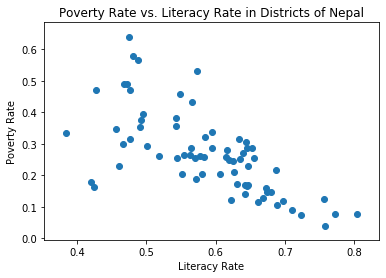

In [10]:
plt.scatter(df['literacy rate'],df['poverty rate'])
plt.xlabel('Literacy Rate')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate vs. Literacy Rate in Districts of Nepal')

It looks like the Poverty rate is inversely related to Literacy rate in a somewhat linear way. We can quantify this relationship by finding the correlation between the two variables.

In [11]:
#Write the code to find the pearson's correlation between literacy rate and poverty rate
df['literacy rate'].corr(df['poverty rate'], method='pearson')

-0.6798893910120695

In [12]:
df.head()

,district,male,literacy rate,years_educ1,years_educ2,years_educ3,years_educ4,years_educ5,years_educ6,years_educ7,years_educ8,hhsize,poverty rate,nkid06,nkid715
0,Achham,0.461668,0.476151,0.080331,0.394979,0.224853,0.145161,0.099263,0.001059,0.050133,0.004221,6.322215,0.472,0.750000,1.166667
1,Arghakhanchi,0.433736,0.652446,0.039106,0.298637,0.253662,0.189621,0.157736,0.000844,0.057360,0.003033,5.179200,0.288,0.458333,1.020833
2,Baglung,0.438207,0.647397,0.043599,0.301124,0.239773,0.186960,0.154035,0.000375,0.070341,0.003793,5.378669,0.229,0.716667,1.083333
3,Baitadi,0.464469,0.548497,0.058514,0.346258,0.259600,0.186120,0.114269,0.000787,0.030814,0.003637,6.748073,0.457,1.133333,1.416667
4,Bajhang,0.477381,0.488333,0.073606,0.417432,0.219511,0.138940,0.112037,0.000483,0.034308,0.003682,6.945809,0.568,0.777778,1.583333


In [13]:
#Write the code to display the last 5 rows of the dataframe
df.tail()

,district,male,literacy rate,years_educ1,years_educ2,years_educ3,years_educ4,years_educ5,years_educ6,years_educ7,years_educ8,hhsize,poverty rate,nkid06,nkid715
66,Syangja,0.428499,0.696740,0.024426,0.233124,0.248407,0.250872,0.179026,0.000864,0.060832,0.002448,5.298789,0.118,0.535714,0.869048
67,Tanahu,0.437649,0.680704,0.035329,0.288172,0.265870,0.197444,0.146315,0.000844,0.061717,0.004310,5.192645,0.148,0.488095,1.107143
68,Taplejung,0.468741,0.639603,0.043544,0.314855,0.265353,0.196421,0.146136,0.000000,0.029723,0.003968,5.778622,0.270,1.166667,2.000000
69,Terhathum,0.463171,0.674394,0.024923,0.252844,0.243664,0.219448,0.211871,0.000688,0.045298,0.001265,5.536696,0.146,0.750000,1.541667
70,Udayapur,0.467240,0.614868,0.040798,0.290338,0.266224,0.183295,0.166718,0.000645,0.049024,0.002957,5.780472,0.259,0.791667,1.305556


Let us remove Achham and Udayapur for now. We will use the model we created to predict the proverty rate of Accham and Udaypur.



In [14]:
#Write the code to get rid of the first and last rows of the dataframe and call the new dataframe df_2d
df_2d = df[1:-1]

In [15]:
df_2d.shape

(69, 15)

In two dimensions, the equation of the line is 
$$y=mx+b $$
where b is the intercept and m is the slope of the line. So basically, linear regression algorithm gives us the most optimal value for the intercept and the slope (in two dimensions). The y and x variables remain the same, since they are the data features and cannot be changed. The values that we can control are the intercept(b) and slope(m). There can be multiple straight lines depending upon the values of intercept and slope. Basically what the linear regression algorithm does is it fits multiple lines on the data points and returns the line that results in the least error.

In [16]:
model= LinearRegression()

In [17]:
#Fill in the x and y values for fit (Note that we want to predict the poverty rates given the literacy rates)
model.fit(df_2d[['literacy rate']], df_2d[['poverty rate']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
model.coef_

array([[-0.94631567]])

In [19]:
#Fill in the x values for predict (Note that we want to predict the poverty rates given the literacy rates)
predictions = model.predict(df_2d[['literacy rate']])

In [20]:
df_2d['predictions'] = predictions

/home/rosebay/Documents/adarsh/tensorflow-practice/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_2d.head()

,district,male,literacy rate,years_educ1,years_educ2,years_educ3,years_educ4,years_educ5,years_educ6,years_educ7,years_educ8,hhsize,poverty rate,nkid06,nkid715,predictions
1,Arghakhanchi,0.433736,0.652446,0.039106,0.298637,0.253662,0.189621,0.157736,0.000844,0.057360,0.003033,5.179200,0.288,0.458333,1.020833,0.204699
2,Baglung,0.438207,0.647397,0.043599,0.301124,0.239773,0.186960,0.154035,0.000375,0.070341,0.003793,5.378669,0.229,0.716667,1.083333,0.209476
3,Baitadi,0.464469,0.548497,0.058514,0.346258,0.259600,0.186120,0.114269,0.000787,0.030814,0.003637,6.748073,0.457,1.133333,1.416667,0.303067
4,Bajhang,0.477381,0.488333,0.073606,0.417432,0.219511,0.138940,0.112037,0.000483,0.034308,0.003682,6.945809,0.568,0.777778,1.583333,0.360001
5,Bajura,0.485493,0.474538,0.093973,0.417503,0.233429,0.136786,0.093656,0.001517,0.019391,0.003744,6.564752,0.641,0.875000,1.166667,0.373055


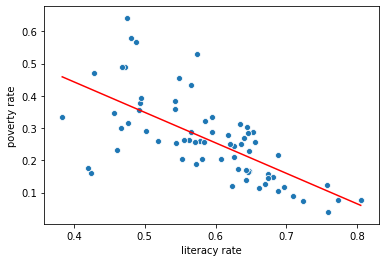

In [22]:
#Plotting the regression line and the data in one graph
sns.lineplot(x='literacy rate', y = 'predictions', data=df_2d, color='red')
sns.scatterplot(x='literacy rate', y = 'poverty rate', data=df_2d)

As discussed earlier, linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code.

In [23]:
#To retrieve the intercept:
b = model.intercept_[0]
print(b)
#For retrieving the slope:
m = model.coef_[0][0]
print(m)

0.8221182820384326
-0.946315665100361


So the equation of the line that best fits the data is 
$$ y = -0.94631567 x + 0.82211828 $$

For Achham, the predicted poverty rate is

In [24]:
round(m*0.476151+b , 3)

0.372

But, we know that the actual poverty rate was 0.472

For Udaypur, the predicted poverty rate is

In [25]:
df[df['district']=='Udayapur']['literacy rate']

70    0.614868
Name: literacy rate, dtype: float64

In [26]:
#Write the code for finding the poverty rate for Udaypur
round(m*df[df['district']=='Udayapur']['literacy rate'] + b, 3)

70    0.24
Name: literacy rate, dtype: float64

But, we know that the actual poverty rate was 0.259

The accuracy or score of Linear Regression is tied to how well the data is correlated with each other. The coefficient of dertermination (R^2) for Linear Regression is the square of correlation.   

# Scikit-Learn Linear Regression <a class="anchor" id="sklearn-linreg"></a>

Scikit-Learn is one of the most popular Python machine learning library available. It contains a multitude of powerful tools the makes it an ideal choice for use in production environments. It provides a very robust, standardized API and comprehensive documentation, so once a user becomes familiar with the structure of building models with the package, it is fairly easy to apply it to other models.

For this reason, we will utilize Scikit-Learn throughout the remainder of this workshop. 

Scikit-Learn's [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model incorporates several different methods behind the scenes that help it to perform more reliably with different types of datasets.

We will use four predictor variables - 'hh size', 'literacy rate', 'nkid06' and 'nkid715' and  to predict the 'poverty rate' where -

* `literacy rate` -  ratio of literate population and total population in the district

* `nkid06` - average share of kids of ages between 1 and 6 in the households of the district

* `nkid715` - average share of kids of ages between 7 and 15 in the households of the district



In [27]:
df_predict = df[['literacy rate','district','nkid06','nkid715','hhsize']]
df_y = df[['poverty rate']]

In [28]:
df_predict.head()

,literacy rate,district,nkid06,nkid715,hhsize
0,0.476151,Achham,0.750000,1.166667,6.322215
1,0.652446,Arghakhanchi,0.458333,1.020833,5.179200
2,0.647397,Baglung,0.716667,1.083333,5.378669
3,0.548497,Baitadi,1.133333,1.416667,6.748073
4,0.488333,Bajhang,0.777778,1.583333,6.945809


In [29]:
df_predict.shape

(71, 5)

In [30]:
df_predict.dropna(inplace=True)

/home/rosebay/Documents/adarsh/tensorflow-practice/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
df_predict.isnull().any()

literacy rate    False
district         False
nkid06           False
nkid715          False
hhsize           False
dtype: bool

In [32]:
#Write the code to drop the column 'district' from the dataframe df_predict
df_predict.drop(columns=['district'], inplace=True)

/home/rosebay/Documents/adarsh/tensorflow-practice/.venv/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
df_predict.head()

,literacy rate,nkid06,nkid715,hhsize
0,0.476151,0.750000,1.166667,6.322215
1,0.652446,0.458333,1.020833,5.179200
2,0.647397,0.716667,1.083333,5.378669
3,0.548497,1.133333,1.416667,6.748073
4,0.488333,0.777778,1.583333,6.945809


Let us split the data in training and testing set. The test_size parameter allows you to control the ratio of testing set you want to randomly capture from your data set. With the random_state parameter you can guarantee that the output of Run 1 will be equal to the output of Run 2, i.e. your split will be always the same.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_predict, df_y, test_size=0.20, random_state=42)

In [35]:
# Let us look at the shape our training and testing splits
X_train.shape, X_test.shape, y_train.shape, X_test.shape

((56, 4), (15, 4), (56, 1), (15, 4))

In [36]:
model= LinearRegression()

In [37]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
predictions = model.predict(X_test)

In [39]:
df_compare = X_test.reset_index(drop=True)

In [40]:
df_compare['Actual'] = y_test.values

In [41]:
df_compare['Predicted'] = predictions

In [42]:
df_compare.head()

,literacy rate,nkid06,nkid715,hhsize,Actual,Predicted
0,0.654978,0.700000,1.083333,5.236356,0.256,0.213130
1,0.476151,0.750000,1.166667,6.322215,0.472,0.297400
2,0.584571,1.166667,1.812500,5.813340,0.322,0.363464
3,0.488333,0.777778,1.583333,6.945809,0.568,0.328710
4,0.631131,0.744444,1.283333,7.264983,0.173,0.224538


In [43]:
df_compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
literacy rate    15 non-null float64
nkid06           15 non-null float64
nkid715          15 non-null float64
hhsize           15 non-null float64
Actual           15 non-null float64
Predicted        15 non-null float64
dtypes: float64(6)
memory usage: 848.0 bytes


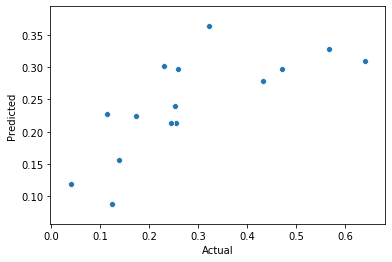

In [44]:
#Write a code to plot a scatterplot of the 'Actual' and the 'Predicted' values from df_compare
sns.scatterplot('Actual', 'Predicted',data=df_compare)

The evaluation of Linear Regression can also be done by finding the residuals, which is the difference of the actual and the predicted values. The values of the residuals should be close to zero.

In [45]:
df_compare['residuals'] = df_compare['Actual'] - df_compare['Predicted']

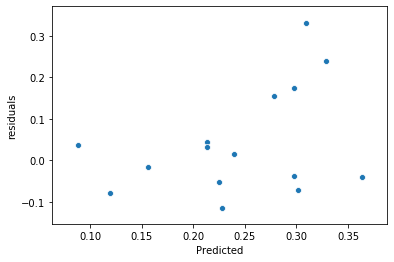

In [46]:
sns.scatterplot(x='Predicted', y = 'residuals', data=df_compare)

In [47]:
from sklearn import metrics

In [48]:
metrics.mean_squared_error(df_compare['Actual'], df_compare['Predicted'])

0.01710873855574724

# Linear Regression Summary <a class="anchor" id="summary"></a>
In this notebook, we have covered the basic concepts of a linear regression, and applied it to estimating poverty rates using several socio-economic variables. 